In [33]:
!pip install -q -U watermark

In [34]:
!pip install -qq transformers

In [35]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#@title Setup & Config
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

import pandas as pd
import os   
import matplotlib.pyplot as plt            
import random    
import numpy as np
import re                                
import string
import nltk                                      
from nltk.stem import PorterStemmer        
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
import imblearn
from imblearn.over_sampling import SMOTE

In [36]:
%reload_ext watermark
%watermark -v -p numpy,pandas,torch,transformers

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 7.9.0

numpy       : 1.21.6
pandas      : 1.3.5
torch       : 1.13.0+cu116
transformers: 4.25.1



In [37]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [38]:
path = '/content/gdrive/MyDrive/Emai_MultiClass'
os.chdir(path)
data1 = pd.read_csv('email_content_cleaned_class1.csv')  
data2 = pd.read_csv('email_content_cleaned_class2.csv')
data3 = pd.read_csv('email_content_cleaned_class3.csv')
data4 = pd.read_csv('email_content_cleaned_class4.csv')
data5 = pd.read_csv('email_content_cleaned_class5.csv')
data6 = pd.read_csv('email_content_cleaned_class6.csv')

In [39]:
ydata = pd.concat([data1.Labels,data2.Labels,data3.Labels,data4.Labels,data5.Labels,data6.Labels],ignore_index=True)
xdata = pd.concat([data1.Content,data2.Content,data3.Content,data4.Content,data5.Content,data6.Content],ignore_index=True)
data = pd.concat([xdata,ydata],axis=1)
data

,Content,Labels
0,Forwarded by Steven J KeanHOUEES on 101899 08...,0
1,In anticipation of potential litigation involv...,0
2,Julia and Stevehere are some questions Ive sen...,0
3,Julia and Stevehere are some questions Ive sen...,0
4,In anticipation of potential litigation involv...,0
...,...,...
1658,ThanksThe same to youVince Original MessageFro...,5
1659,AnitaVery minor changesThanksVince,5
1660,Original MessageFrom Joanna Vidal jvidalriskw...,5
1661,ConfidentialRikaI spoke to Kevin the other day...,5


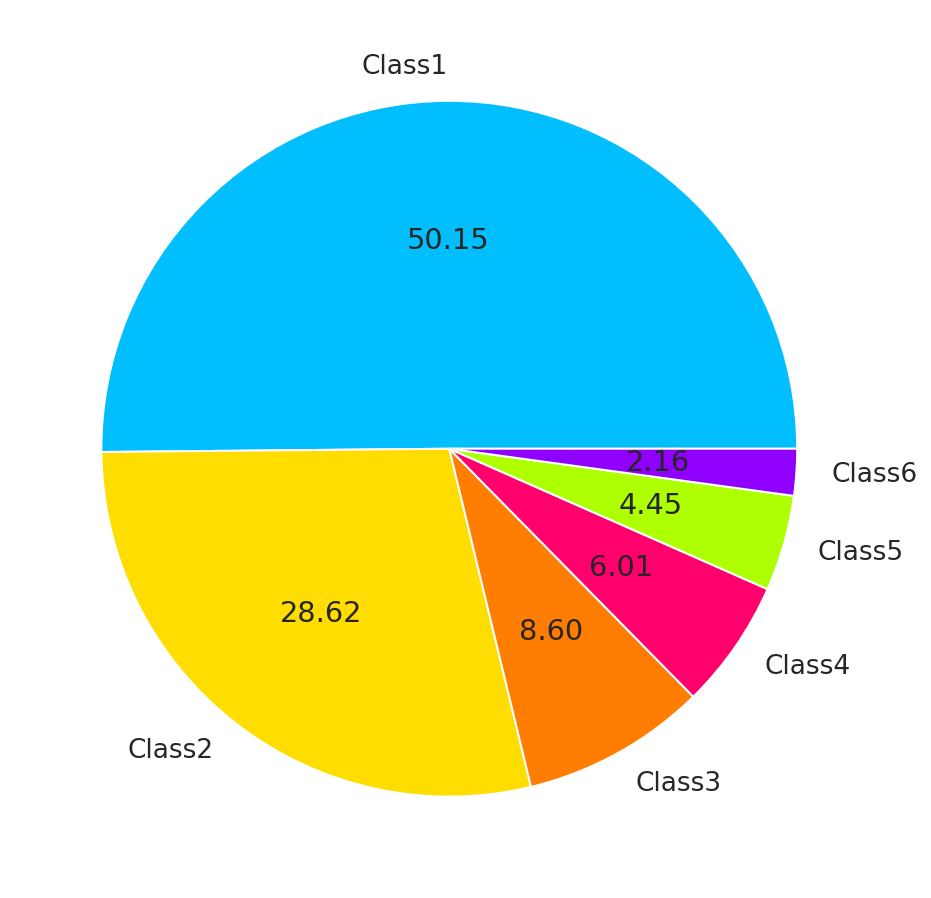

In [40]:
plt.pie(ydata.value_counts(), labels=['Class1','Class2','Class3','Class4','Class5','Class6'],autopct="%0.2f")
plt.show()

In [41]:
pip install -U sentence-transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from sentence_transformers import SentenceTransformer


In [43]:
model = SentenceTransformer('all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [44]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

query_embedding = model.encode('How big is London')
passage_embedding = model.encode(['London has 9,787,426 inhabitants at the 2011 census',
                                  'London is known for its finacial district'])

print("Similarity:", util.dot_score(query_embedding, passage_embedding))

Similarity: tensor([[0.5472, 0.6330]])


In [45]:
data

,Content,Labels
0,Forwarded by Steven J KeanHOUEES on 101899 08...,0
1,In anticipation of potential litigation involv...,0
2,Julia and Stevehere are some questions Ive sen...,0
3,Julia and Stevehere are some questions Ive sen...,0
4,In anticipation of potential litigation involv...,0
...,...,...
1658,ThanksThe same to youVince Original MessageFro...,5
1659,AnitaVery minor changesThanksVince,5
1660,Original MessageFrom Joanna Vidal jvidalriskw...,5
1661,ConfidentialRikaI spoke to Kevin the other day...,5


In [46]:
data.Content[1]

'In anticipation of potential litigation involving TWs operational activities please prepare an analysis for me of the reasons for TWs sale of excess natural gas at the California border  I am aware of several of these sales and have been  informed that excess pressure at the border is the basic reason for them  Id like a more specific explanation that includes the following information1  What are the specific pressures and volume considerations that could make it operationally necessary to sell gas at the California border  2  What is the process that is followed to make such a determination3  Which individuals or groups are involved in determining whether an operational sale is necessary4  In what way have system operations changed since last year and how do those changes contribute to the increased frequency of such sales compared to previous years5 What alternatives to operational sales are considered before the decision to make a sale is reached Thanks for your attention to this r

In [47]:

import nltk   
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    
    y = []
    #if null
    for i in text:
        if i.isalnum():
            y.append(i)
    
    
    text = y[:]
    y.clear()
    #stem the words  
    for i in text:
        y.append(ps.stem(i))

    # text = y[:]
    # y.clear()
    # #stem the words  
    # for i in text:
    #     y.append(lemmatizer.lemmatize(i))
    
    #convert to string
    y = " ".join(y)
    
    #remove digits
    y = re.sub(r'\d+', '', y)
    
    return y

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
transform_text(data.Content[1])

'in anticip of potenti litig involv tw oper activ pleas prepar an analysi for me of the reason for tw sale of excess natur ga at the california border i am awar of sever of these sale and have been inform that excess pressur at the border is the basic reason for them id like a more specif explan that includ the follow information what are the specif pressur and volum consider that could make it oper necessari to sell ga at the california border  what is the process that is follow to make such a determination which individu or group are involv in determin whether an oper sale is necessary in what way have system oper chang sinc last year and how do those chang contribut to the increas frequenc of such sale compar to previou years what altern to oper sale are consid befor the decis to make a sale is reach thank for your attent to thi request pleas give me a call to discuss and pleas design your respons as privileg and confidenti attorney client privileg'

In [49]:
data['transformed_text'] = data['Content'].apply(transform_text)
data

,Content,Labels,transformed_text
0,Forwarded by Steven J KeanHOUEES on 101899 08...,0,forward by steven j keanhoue on am karen den...
1,In anticipation of potential litigation involv...,0,in anticip of potenti litig involv tw oper act...
2,Julia and Stevehere are some questions Ive sen...,0,julia and steveher are some question ive sent ...
3,Julia and Stevehere are some questions Ive sen...,0,julia and steveher are some question ive sent ...
4,In anticipation of potential litigation involv...,0,in anticip of potenti litig involv tw oper act...
...,...,...,...
1658,ThanksThe same to youVince Original MessageFro...,5,thanksth same to youvinc origin messagefrom jo...
1659,AnitaVery minor changesThanksVince,5,anitaveri minor changesthanksvinc
1660,Original MessageFrom Joanna Vidal jvidalriskw...,5,origin messagefrom joanna vidal jvidalriskwate...
1661,ConfidentialRikaI spoke to Kevin the other day...,5,confidentialrikai spoke to kevin the other day...


In [50]:
temp2 = data.transformed_text
temp2[1]

'in anticip of potenti litig involv tw oper activ pleas prepar an analysi for me of the reason for tw sale of excess natur ga at the california border i am awar of sever of these sale and have been inform that excess pressur at the border is the basic reason for them id like a more specif explan that includ the follow information what are the specif pressur and volum consider that could make it oper necessari to sell ga at the california border  what is the process that is follow to make such a determination which individu or group are involv in determin whether an oper sale is necessary in what way have system oper chang sinc last year and how do those chang contribut to the increas frequenc of such sale compar to previou years what altern to oper sale are consid befor the decis to make a sale is reach thank for your attent to thi request pleas give me a call to discuss and pleas design your respons as privileg and confidenti attorney client privileg'

In [51]:
#Computing embeddings using sentence transformer
emd = []
for i in range(xdata.shape[0]):
  emd.append(model.encode(temp2[i]))

X = np.array(emd)
X.shape

(1663, 384)

In [52]:
models = [LogisticRegression(solver='liblinear', penalty='l1'), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), 
          RandomForestClassifier(n_estimators=50, random_state=2), LinearSVC(), MLPClassifier(hidden_layer_sizes=(50,))]

names = ['Logistic Regressor','Gaussian naive Bayes','KNN','Decision tree','Random forest','SVM-Linear','ANN']

In [59]:
from sklearn.model_selection import cross_validate

for model, name in zip(models, names):
    print(name)
    
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
    }
    scores = cross_validate(model, X, ydata, cv=10, n_jobs=4, scoring=scoring)
    # training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("\n")
    

Logistic Regressor
accuracy:  0.6553639708534738
f1_score:  0.305687093626695


Gaussian naive Bayes
accuracy:  0.5795974316427387
f1_score:  0.41933454849892937


KNN
accuracy:  0.6349686169829017
f1_score:  0.3669353299361353


Decision tree
accuracy:  0.4972332443546642
f1_score:  0.3021881295151434


Random forest
accuracy:  0.6415698723035855
f1_score:  0.2958772041224177


SVM-Linear
accuracy:  0.672209797272924
f1_score:  0.4351325322887961


ANN
accuracy:  0.6541483298463313
f1_score:  0.4694730027184966




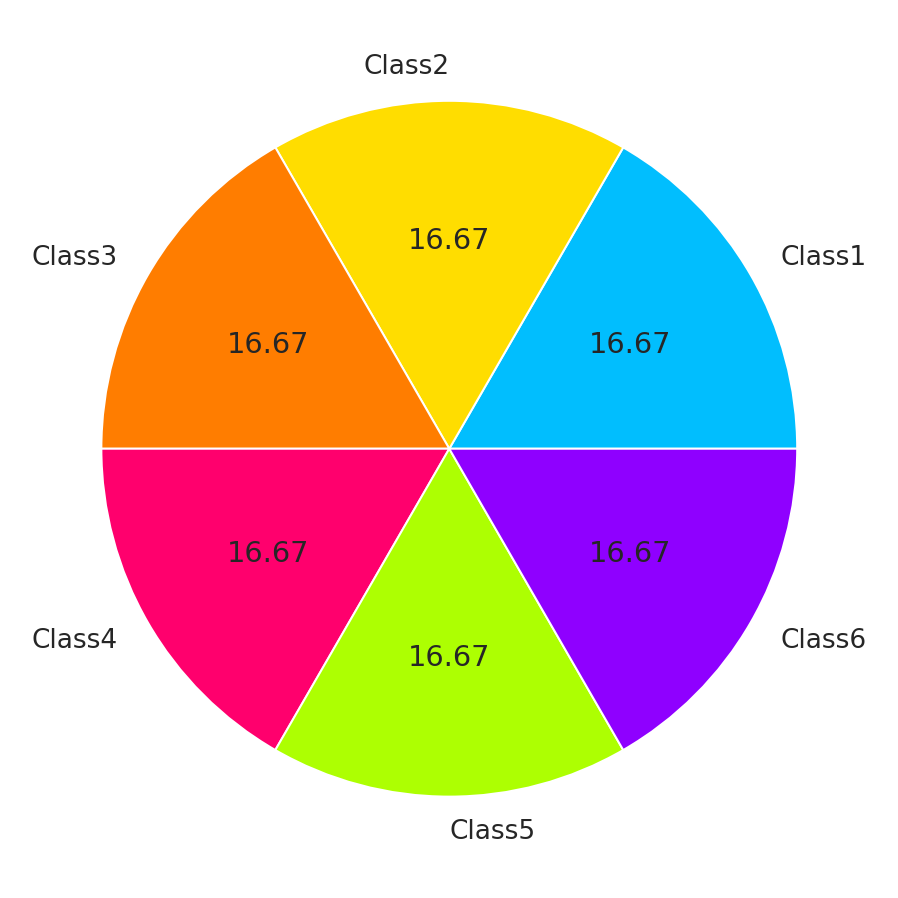

In [60]:
#Using SMOTE to solve imbalance issue
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, ydata)
plt.pie(y1.value_counts(), labels=['Class1','Class2','Class3','Class4','Class5','Class6'],autopct="%0.2f")
plt.show()

In [64]:
print('Number of samples after SMOTE : ' ,X1.shape[0])

Number of samples after SMOTE :  5004


In [62]:
#Performance of different classifiers

for model, name in zip(models, names):
    print(name)
    
    scoring = {
        'acc': 'accuracy',
        'f1_mac': 'f1_macro',
    }
    scores = cross_validate(model, X1, y1, cv=10, n_jobs=4, scoring=scoring)
    # training_time = (time.time() - start)
    print("accuracy: ", scores['test_acc'].mean())
    print("f1_score: ", scores['test_f1_mac'].mean())
    print("\n")
    

Logistic Regressor
accuracy:  0.8163493013972056
f1_score:  0.8113397043095751


Gaussian naive Bayes
accuracy:  0.693653892215569
f1_score:  0.6934925437757793


KNN
accuracy:  0.8263512974051895
f1_score:  0.7946863382288742


Decision tree
accuracy:  0.7711964071856287
f1_score:  0.7659702079119297


Random forest
accuracy:  0.9282638722554889
f1_score:  0.9261335805065185


SVM-Linear
accuracy:  0.8617125748502994
f1_score:  0.8566838668108744


ANN
accuracy:  0.9240634730538921
f1_score:  0.9202196748426242


